In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Nuestros scripts
from src.Plot_Induction_Figure import graficaInduccion 
from src import Preprocess

seed = 42
test_size = 0.2

# Proyecto FAA

por **Jorge Durán, Jaime Enríquez, Marcos de las Heras** para la asignatura de *Fundamentos de Aprendizaje Automático*.

## Objetivo

Clasificar series de estimulaciones por sensores entre "banana", "wine" y "background":
* Clasificación Multiclase
* Atributos reales

## Pre-análisis de datos

### Cargar datos

**Metadata**:

In [3]:
metadata_df = Preprocess.load_metadata(par_dir=os.getcwd())

In [4]:
metadata_df.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [5]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   date    100 non-null    object 
 2   class   100 non-null    object 
 3   t0      100 non-null    float64
 4   dt      100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [6]:
metadata_df.describe()

,id,t0,dt
count,100.000000,100.000000,100.000000
mean,49.500000,13.178600,0.751600
std,29.011492,4.799102,0.428424
min,0.000000,5.620000,0.120000
25%,24.750000,8.320000,0.480000
50%,49.500000,13.385000,0.620000
75%,74.250000,16.380000,0.932500
max,99.000000,23.620000,2.310000


**Dataset**:

In [7]:
dataset_df = Preprocess.load_dataset(par_dir=os.getcwd())

In [8]:
dataset_df.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0.0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0.0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0.0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0.0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0.0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [9]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  float64
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(12)
memory usage: 85.1 MB


In [10]:
dataset_df.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


### Representación de datos

* Frecuencia cada clase en experimentos:

Text(0.5, 1.0, 'Histograma clases de experimentos')

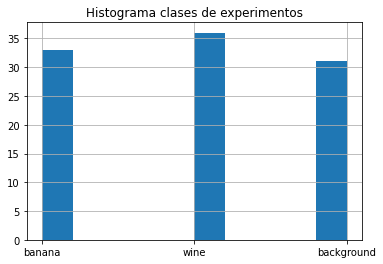

In [11]:
metadata_df["class"].hist()
plt.title("Histograma clases de experimentos")

* Numero de medidas tomadas en sensor_d por experimento

Text(0.5, 1.0, 'Histograma num. muestras por experimento')

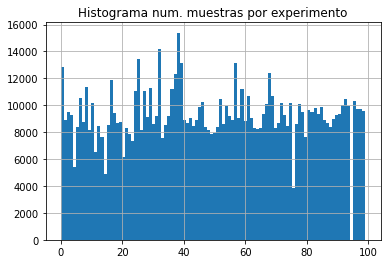

In [12]:
# Frecuencia de datos en sensor_d por experimento
dataset_df["id"].hist(bins=len(metadata_df))
plt.title("Histograma num. muestras por experimento")

* ¿Qué ids no tienen valores? En el caso de que exita lo descartamos.

In [13]:
for id in metadata_df["id"]:
    if id not in dataset_df["id"].unique():
        print("Descartando id =",id) 
        metadata_df.drop(id, inplace=True)

Descartando id = 95


* ¿Qué ids no tienen valores antes, durante y/o después de la inducción del objeto? 

In [14]:
dataset_df_antes, dataset_df_durante, dataset_df_despues = Preprocess.separar_dataset_segun_tiempo(dataset_df, 
                                                                                                   metadata_df)
Preprocess.get_missing_values(metadata_df, dfs=[dataset_df_antes, dataset_df_durante, dataset_df_despues])

[Series([], Name: id, dtype: int64),
 Series([], Name: id, dtype: int64),
 14    14
 76    76
 Name: id, dtype: int64]

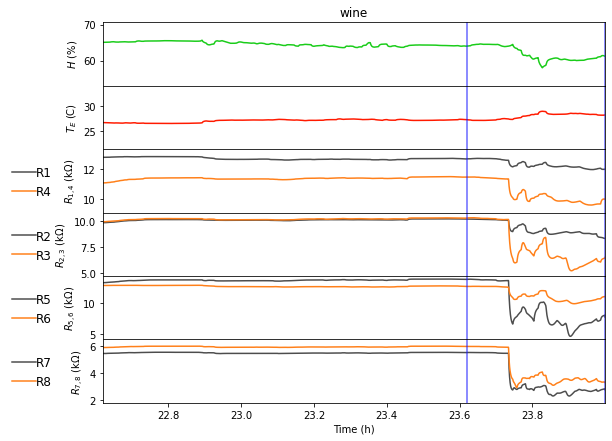

In [15]:
graficaInduccion(id=14, metadata=metadata_df.values, dataset=dataset_df.values)

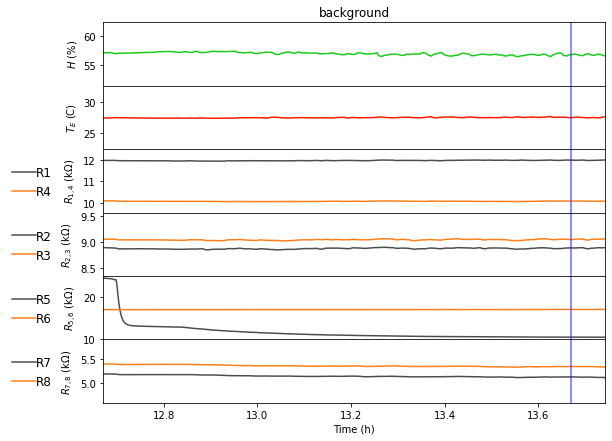

In [16]:
graficaInduccion(id=76, metadata=metadata_df.values, dataset=dataset_df.values)

> Los experimentos con **ids 14 y 76** no tienen datos para después de la inducción. De momento serán descartados.

In [17]:
dataset_df_antes_clean = dataset_df_antes.loc[(dataset_df_antes.id!=76) & (dataset_df_antes.id!=14)]
dataset_df_durante_clean = dataset_df_durante.loc[(dataset_df_durante.id!=76) & (dataset_df_durante.id!=14)]
dataset_df_despues_clean = dataset_df_despues
dataset_df_clean = dataset_df.loc[(dataset_df.id!=76) & (dataset_df.id!=14)]
metadata_df_clean = metadata_df.loc[(metadata_df.id!=76) & (metadata_df.id!=14)]

* Gráficas para sensores, temperatura y humedad para cada clase.

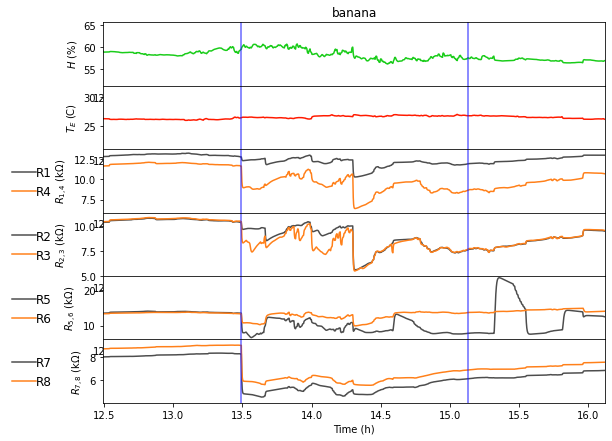

In [18]:
graficaInduccion(id=0, metadata=metadata_df.values, dataset=dataset_df.values)

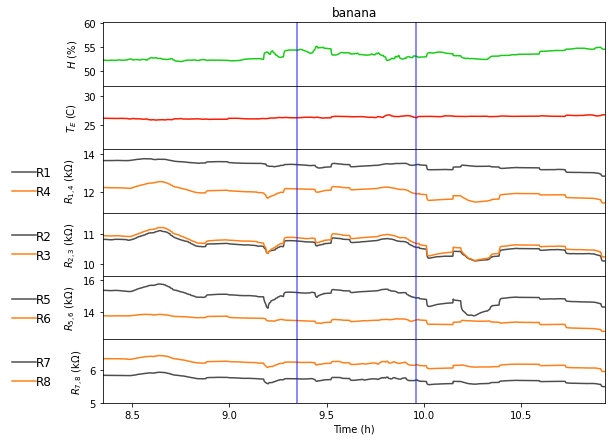

In [19]:
graficaInduccion(id=9, metadata=metadata_df.values, dataset=dataset_df.values)

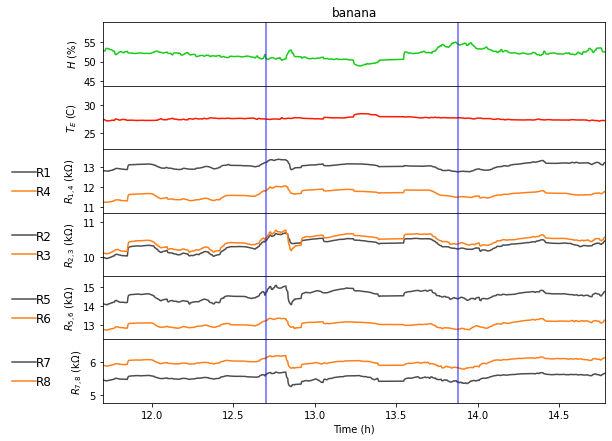

In [20]:
graficaInduccion(id=10, metadata=metadata_df.values, dataset=dataset_df.values)

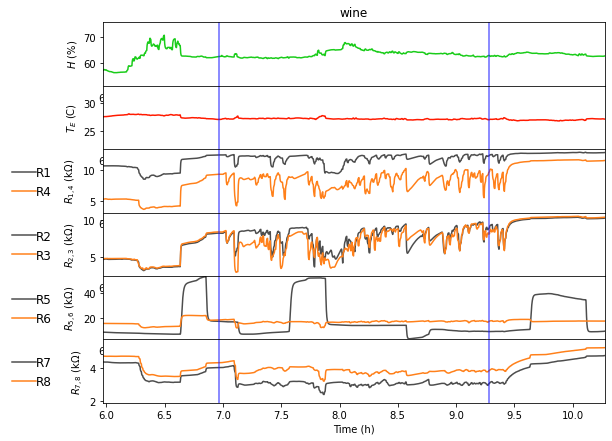

In [21]:
graficaInduccion(metadata=metadata_df.values, dataset=dataset_df.values)

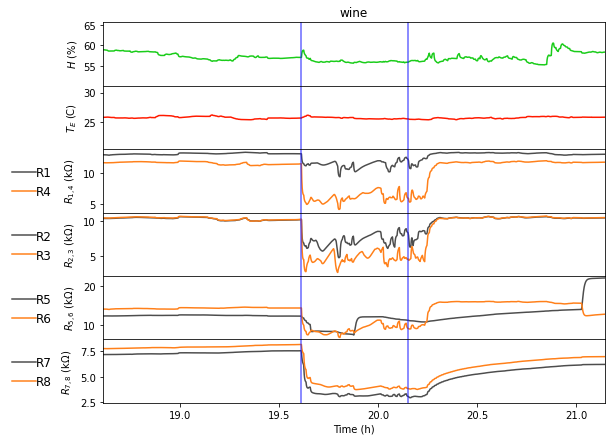

In [22]:
graficaInduccion(id=1, metadata=metadata_df.values, dataset=dataset_df.values)

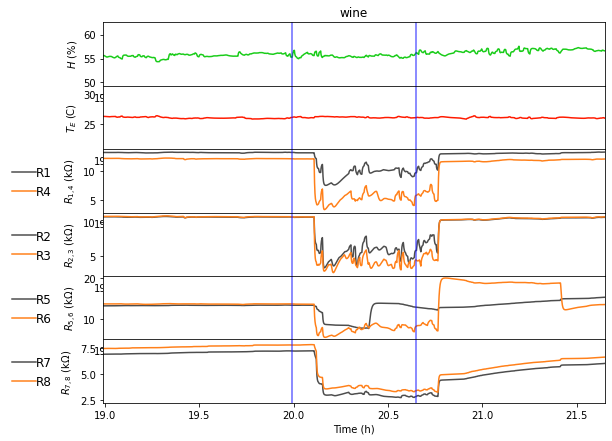

In [23]:
graficaInduccion(id=2, metadata=metadata_df.values, dataset=dataset_df.values)

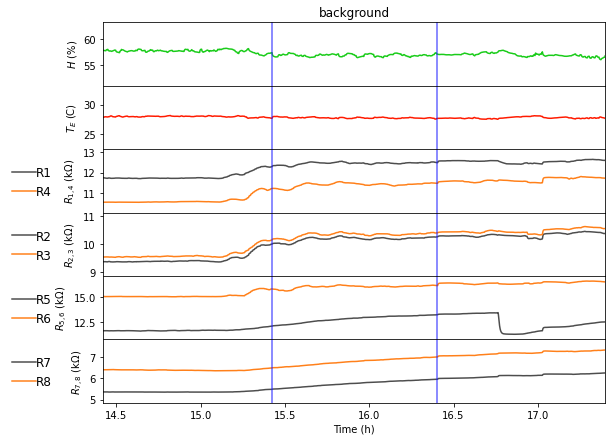

In [24]:
graficaInduccion(id=69, metadata=metadata_df.values, dataset=dataset_df.values)

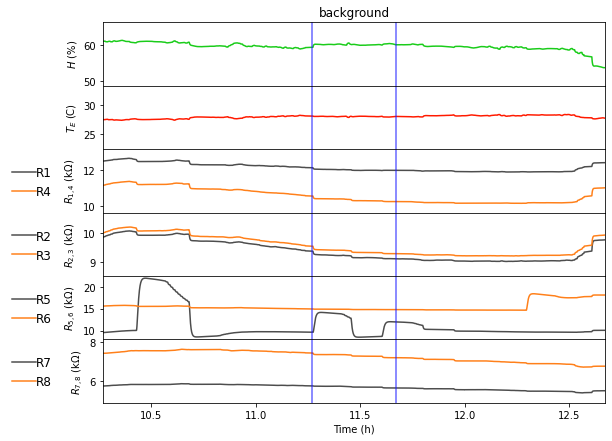

In [25]:
x = graficaInduccion(id=70, metadata=metadata_df.values, dataset=dataset_df.values)

* Grafica temperatura vs humedad media

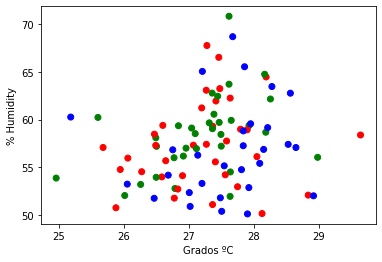

In [26]:
from matplotlib.lines import Line2D

color = {'wine':'r', 'banana':'g', 'background':'b'}
metadata_color = [color[c] for c in metadata_df_clean["class"]]
Preprocess.plotTempHum(dataset_df_clean, c = metadata_color)

* Separación de ids de experimentos **por clase**

In [27]:
# Separacion de ids por clase 
dataset_ban, dataset_win , dataset_bac = Preprocess.split_class_id(metadata_df_clean)

* Cálculo de varianzas de sensores por experimento. Se obtiene diccionario de forma *(num_ids, num_sensores)*:

In [28]:
# Varianzas de cada etapa agrupado por experimento
vars_dataset = Preprocess.varianzas_sensores(dataset_df_clean)

vars_dataset_antes = Preprocess.varianzas_sensores(dataset_df_antes_clean)
vars_dataset_durante = Preprocess.varianzas_sensores(dataset_df_durante_clean)
vars_dataset_despues = Preprocess.varianzas_sensores(dataset_df_despues_clean)

* Cálculo de distancia entre maximo y minimo (global y durante el experimento)

In [29]:
max_dataset = Preprocess.max_sensores(dataset_df_clean)

max_dataset_antes = Preprocess.max_sensores(dataset_df_antes_clean)
max_dataset_durante= Preprocess.max_sensores(dataset_df_durante_clean)
max_dataset_despues= Preprocess.max_sensores(dataset_df_despues_clean)

min_dataset = Preprocess.min_sensores(dataset_df_clean)

min_dataset_antes = Preprocess.min_sensores(dataset_df_antes_clean)
min_dataset_durante= Preprocess.min_sensores(dataset_df_durante_clean)
min_dataset_despues= Preprocess.min_sensores(dataset_df_despues_clean)

ampl_dataset = {}
ampl_dataset_antes = {}
ampl_dataset_durante = {}
ampl_dataset_despues = {}
for i in max_dataset.keys():    
    ampl_dataset[i] = np.array(max_dataset[i]) - np.array(min_dataset[i])
    ampl_dataset_antes[i] = np.array(max_dataset_antes[i]) - np.array(min_dataset_antes[i])
    ampl_dataset_durante[i] = np.array(max_dataset_durante[i]) - np.array(min_dataset_durante[i])
    ampl_dataset_despues[i] = np.array(max_dataset_despues[i]) - np.array(min_dataset_despues[i])


## Elección de Modelo

* Antes de la división de atributos se **estandarizan**:

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

* Codificación de clases y estandarización de input de modelo.

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

y = metadata_df_clean["class"]

le = LabelEncoder()
le.fit(y)

X_ampl = np.array(list(ampl_dataset_durante.values()))

X_var = np.array(list(vars_dataset_durante.values()))

X_hum = np.array([i.mean() for _,i in dataset_df_clean["Humidity"].groupby(dataset_df_clean.id)]).reshape(-1,1)

X_temp = np.array([i.mean() for _,i in dataset_df_clean["Temp."].groupby(dataset_df_clean.id)]).reshape(-1,1) 


X = np.concatenate((X_var, X_ampl, X_hum, X_temp), axis=1)

# Estandarización y codificación.
X_scaled = scaler.fit_transform(X)
y_encode = le.transform(y)

* Se utiliza el módulo [*LazyPredic*](https://github.com/shankarpandala/lazypredict)  que permite declarar y comparar varios modelos populares de clasificación eficientemente. Se utilizarán varias opciones de separación de datos y se calculará qué modelo obtiene mejor "accuracy" de media.

In [32]:
from lazypredict.Supervised import LazyClassifier

# División entre datos de entreno y testeo
# Para poder obtener la misma proporción que el dataset original en el test utilzamos StratifiedShiffleSplit
models_sum = None
for i in range(30): # se repite 30 veces
    # Nueva división aleatoria
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
    for train_index, test_index in split.split(X, y_encode):
        X_train = X_scaled[train_index]
        y_train_encode = y_encode[train_index]
        X_test = X_scaled[test_index]
        y_test_encode = y_encode[test_index]
        # NUevo cálculo para todos los modelos
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models, predictions = clf.fit(X_train, X_test, y_train_encode, y_test_encode)
        # Lo añadimos a la cuenta general
        if models_sum is None: models_sum = models[["Accuracy", "F1 Score"]]
        else: models_sum += models[["Accuracy", "F1 Score"]]

 90%|█████████ | 27/30 [00:00<00:00, 38.20it/s]

[19:02:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|█████████▋| 29/30 [00:01<00:00, 19.32it/s]

[19:02:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 39.53it/s]

[19:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 41.05it/s]

[19:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 43.93it/s]

[19:02:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 43.78it/s]

[19:02:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|███████▎  | 22/30 [00:00<00:00, 69.43it/s]

[19:02:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 43.96it/s]

[19:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|███████▎  | 22/30 [00:00<00:00, 71.03it/s]

[19:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 50.59it/s]

[19:02:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 40.99it/s]

[19:02:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 42.73it/s]

[19:02:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 41.19it/s]

[19:02:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|███████   | 21/30 [00:00<00:00, 65.48it/s]

[19:02:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|███████▎  | 22/30 [00:00<00:00, 70.90it/s]

[19:02:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 43.57it/s]

[19:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 42.83it/s]

[19:02:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 41.48it/s]

[19:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|█████████▋| 29/30 [00:00<00:00, 28.14it/s]

[19:02:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|████████▎ | 25/30 [00:00<00:00, 36.82it/s]

[19:02:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 87%|████████▋ | 26/30 [00:00<00:00, 36.74it/s]

[19:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████ | 27/30 [00:00<00:00, 31.17it/s]

[19:02:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████  | 24/30 [00:00<00:00, 30.50it/s]

[19:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|█████████▋| 29/30 [00:00<00:00, 30.11it/s]

[19:02:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 41.49it/s]

[19:02:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████  | 24/30 [00:00<00:00, 35.30it/s]

[19:02:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 42.20it/s]

[19:02:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 42.08it/s]

[19:02:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 40.71it/s]

[19:02:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|███████▋  | 23/30 [00:00<00:00, 44.49it/s]

[19:02:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:01<00:00, 20.40it/s]


In [33]:
models_sum.sort_values(ascending=False, by="Accuracy") / 30 # Calculamos media

,Accuracy,F1 Score
Model,,
RandomForestClassifier,0.77,0.77
XGBClassifier,0.77,0.76
LogisticRegression,0.76,0.74
CalibratedClassifierCV,0.75,0.73
BaggingClassifier,0.75,0.74
LGBMClassifier,0.74,0.74
NearestCentroid,0.74,0.73
ExtraTreesClassifier,0.74,0.73
LinearSVC,0.74,0.71


* Elegimos como modelos LogisticRegression, KNeighborsClassifier, LinearSVC, XGBClassifier y RandomForest, y mostramos sus matrices de confusión.

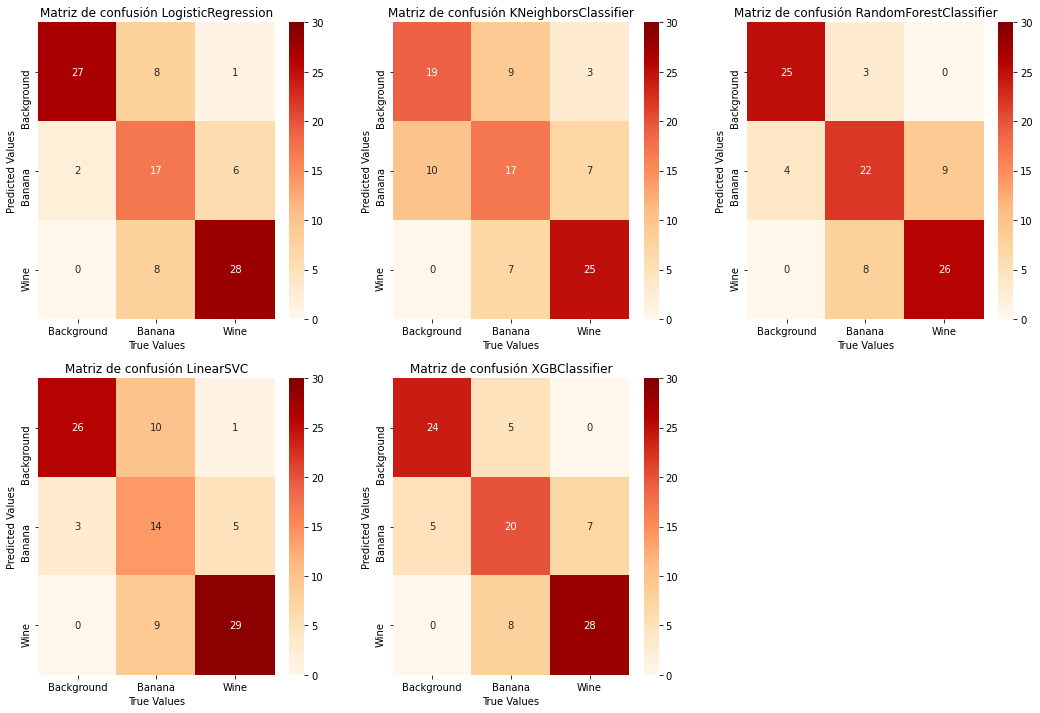

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

log = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svc = LinearSVC()
xgb = XGBClassifier(verbosity = 0)

plt.figure(figsize=(18,12))
x = ["Background", "Banana", "Wine"]
xi = np.arange(0.5,3.5)
i=1

for name, model in zip(["LogisticRegression", "KNeighborsClassifier", "RandomForestClassifier","LinearSVC","XGBClassifier"],
                 [log, knn, rf, svc, xgb]):
    preds = cross_val_predict(model, X_scaled, y_encode, cv=10)
    #print("Matriz de confusión de", name)
    plt.subplot(2,3,i)
    plt.title("Matriz de confusión "+name)
    sns.heatmap(confusion_matrix(preds, y_encode), annot=True, cmap="OrRd", vmin=0, vmax=30)  
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.xticks(xi,x)
    plt.yticks(xi,x)
    i+=1
plt.show()

* Redes neuronales obtienen resultados muy malos

In [35]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train[0].shape))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

history = model.fit(X_train, y_train_encode, epochs=100, 
                    validation_data=(X_test, y_test_encode))

Epoch 1/100
3/3 [==============================] - 1s 222ms/step - loss: 1.5390 - accuracy: 0.1471 - val_loss: 1.5273 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 1.4760 - accuracy: 0.1857 - val_loss: 1.4733 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 1.4838 - accuracy: 0.2438 - val_loss: 1.4254 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 1.4177 - accuracy: 0.2399 - val_loss: 1.3800 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 1.3219 - accuracy: 0.2882 - val_loss: 1.3409 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 1.4294 - accuracy: 0.2802 - val_loss: 1.3035 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.2527 - accuracy: 0.3248 - val_loss: 1.2708 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 15ms/step - loss: 0.7974 - accuracy: 0.7001 - val_loss: 0.8455 - val_accuracy: 0.7000
Epoch 60/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7529 - accuracy: 0.7587 - val_loss: 0.8436 - val_accuracy: 0.7000
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7682 - accuracy: 0.7196 - val_loss: 0.8419 - val_accuracy: 0.7000
Epoch 62/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7529 - accuracy: 0.7157 - val_loss: 0.8402 - val_accuracy: 0.7000
Epoch 63/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7698 - accuracy: 0.7235 - val_loss: 0.8387 - val_accuracy: 0.7000
Epoch 64/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7897 - accuracy: 0.7079 - val_loss: 0.8374 - val_accuracy: 0.7000
Epoch 65/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7427 - accuracy: 0.7214 - val_loss: 0.8356 - val_accuracy: 0.7000
Epoch 66/100
3/3 [========

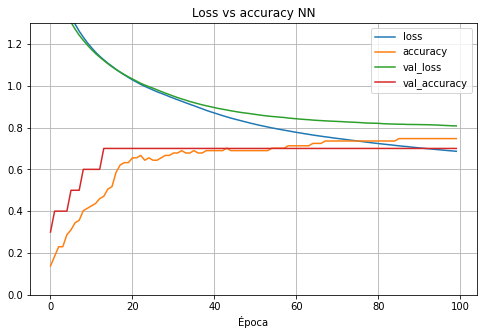

In [37]:
# Representación de curvas de aprendizaje
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.title("Loss vs accuracy NN")
plt.xlabel("Época")
plt.gca().set_ylim(0,1.3)
plt.show()

## Afinación de parámetros

* Utilizando Sci-kit Learn podemos buscar los hiperparámetros que mejores resultados obtengan. Elegimos XGBClassifier como modelo.

> * Mejores parámetros encontrados

In [38]:
from sklearn.model_selection import GridSearchCV

# XGB (https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-tuning.html )
params_xgb = {"n_estimators":[15,20,30,50],
            'reg_lambda':[2,1],
            'gamma':[0,0.3,0.2,0.1],
            'eta':[0.08, 0.07, 0.06, 0.05, 0.04],
            "max_depth":[3,5]}

xgb_grid_clf = GridSearchCV(xgb, params_xgb, scoring="accuracy", cv=10)

xgb_search = xgb_grid_clf.fit(X_train, y_train_encode)

xgb_search.best_params_

{'eta': 0.07,
 'gamma': 0.3,
 'max_depth': 3,
 'n_estimators': 50,
 'reg_lambda': 1}

In [39]:
params_log = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

log_grid_clf=GridSearchCV(log, params_log, scoring="accuracy", cv=10)

log_search = log_grid_clf.fit(X_train, y_train_encode)

log_search.best_params_

{'C': 1000.0, 'penalty': 'l2'}

> * Importancia de cada atributo de entrada

In [40]:
nom_attr = ["VarSensor"+str(i) for i in range(1,9)]+["AmpSensor"+str(i) for i in range(1,9)]+["Temp", "Hum"]
print("Importancia de atributos para XGBClassifier \n")
for name, att in zip(nom_attr, xgb_search.best_estimator_.feature_importances_):
    print(name, att)

Importancia de atributos para XGBClassifier 

VarSensor1 0.06219903
VarSensor2 0.0894997
VarSensor3 0.0
VarSensor4 0.023333533
VarSensor5 0.022620525
VarSensor6 0.06665534
VarSensor7 0.22270998
VarSensor8 0.024613861
AmpSensor1 0.075095214
AmpSensor2 0.15582716
AmpSensor3 0.023416834
AmpSensor4 0.052428275
AmpSensor5 0.047452282
AmpSensor6 0.027375488
AmpSensor7 0.033209138
AmpSensor8 0.019103264
Temp 0.03563673
Hum 0.01882355


## Modelos Finales

In [41]:
xgb_best = xgb_search.best_estimator_
log_best = log_search.best_estimator_

* Accuracy:

In [42]:
xgb_best.fit(X_train, y_train_encode)
log_best.fit(X_train, y_train_encode)

print(xgb_best.score(X_test, y_test_encode))
print(log_best.score(X_test, y_test_encode))

0.7
0.7


## One VS Rest

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from src.Preprocess import *

In [44]:
metadata = Preprocess.load_metadata(par_dir=os.getcwd())
dataset = Preprocess.load_dataset(par_dir=os.getcwd())





In [45]:
clases = Preprocess.get_class_lists(metadata)
vars1, vars2, vars3 = get_split_np_data(dataset, metadata)
vars4 = merge_np_data(vars2, vars3, delete1=True)
vars5 = merge_np_data(vars1, vars4, delete1=True)


conj_datos = {}
conj_datos["all"] = (vars2, clases["all"][0]) # Contiene los procesos durante la induccion
conj_datos["banana"] = (vars2, clases["banana"][0]) # Contiene los procesos durante la induccion
conj_datos["wine"] = (vars4, clases["wine"][1]) # Contiene los procesos durante y despues de la induccion
conj_datos["background"] = (vars5, clases["background"][1]) # Contiene los procesos antes, durante y despues de la induccion

In [46]:
def evaluation(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # classifier = RandomForestClassifier(random_state=0)
    clf = RandomForestClassifier(max_depth=2, random_state=123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Evaluacion clasificador")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    score = cross_val_score(clf, X, y, cv=5)
    print("Cross_validation:", score, "Media de acierto", np.round(score.mean(), 4))
    print("Acurracy score: ", accuracy_score(y_test, y_pred))
    if name != "all":
        print("Error: ", (np.square(y_pred - y_test)).mean())
        plot_roc_curve(clf, X_test, y_test, name=name+" classifier")
    print("\n\n")

PRUEBAS CON EL CONJUNTO DE DATOS DE TIPO: all
Evaluacion clasificador
[[2 3 0]
 [1 7 0]
 [2 0 5]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.70      0.88      0.78         8
           2       1.00      0.71      0.83         7

    accuracy                           0.70        20
   macro avg       0.70      0.66      0.67        20
weighted avg       0.73      0.70      0.70        20

Cross_validation: [0.75       0.6        0.8        0.8        0.84210526] Media de acierto 0.7584
Acurracy score:  0.7







PRUEBAS CON EL CONJUNTO DE DATOS DE TIPO: banana
Evaluacion clasificador
[[13  2]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.50      0.40      0.44         5

    accuracy                           0.75        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.73      0

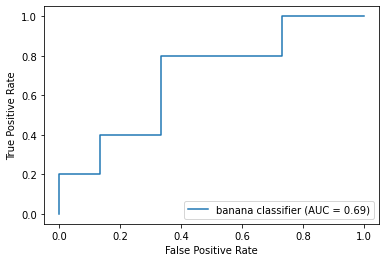

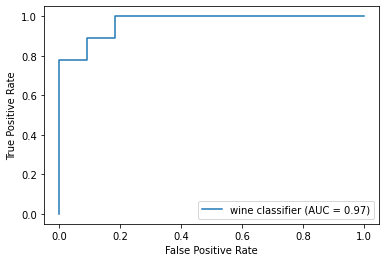

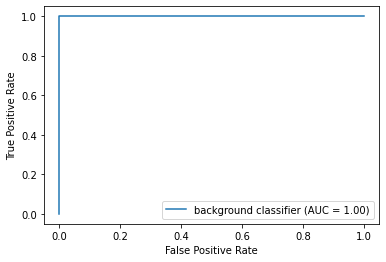

In [47]:
for c in conj_datos:
    print("PRUEBAS CON EL CONJUNTO DE DATOS DE TIPO:", c)
    evaluation(conj_datos[c][0], conj_datos[c][1], c)
    if c !="all":
        plt.savefig(c+".png", dpi=300)
    print("\n\n\n")
    
    
    clf = RandomForestClassifier(max_depth=2, random_state=123)